In [ ]:
# ================================================
# IMPLEMENTASI ANN UNTUK KLASIFIKASI KUALITAS AIR
# ================================================

# --- Install package jika belum tersedia ---
# pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout


**Deskripsi Dataset**

In [163]:
# --- 1. Load Dataset ---
df = pd.read_csv(r"C:\Users\NITRO\DEEP LEARNING\sipeka_sensor_data.csv", sep=';')

# --- 2. Pilih Fitur dan Target ---
X = df[['ph', 'suhu', 'amonia']]
y = df['label']  # Pastikan kolom 'label' benar-benar ada

In [164]:
#1  Statistik Deskriptif
# Tampilkan 5 baris awal data
print(df.head())

# Statistik deskriptif untuk fitur numerik
print("\nStatistik Deskriptif:")
print(df[['ph', 'suhu', 'amonia']].describe())


               date   ph  suhu  amonia   label
0  24/08/2024 09:36  562  1603     169  Bahaya
1  25/08/2024 09:36  966  2563     279  Bahaya
2  26/08/2024 09:36  812  2581     177  Normal
3  27/08/2024 09:36  719  2775      89  Normal
4  28/08/2024 09:36  409  2952     121  Bahaya

Statistik Deskriptif:
               ph         suhu     amonia
count  800.000000   800.000000  800.00000
mean   586.305000  2246.618750  383.83875
std    237.569002   864.484724  288.27856
min     30.000000   150.000000    1.00000
25%    468.000000  1932.750000  126.75000
50%    627.500000  2417.500000  359.00000
75%    748.250000  2821.500000  605.25000
max    997.000000  3499.000000  997.00000


**Exploratory Data Analysis (EDA)**

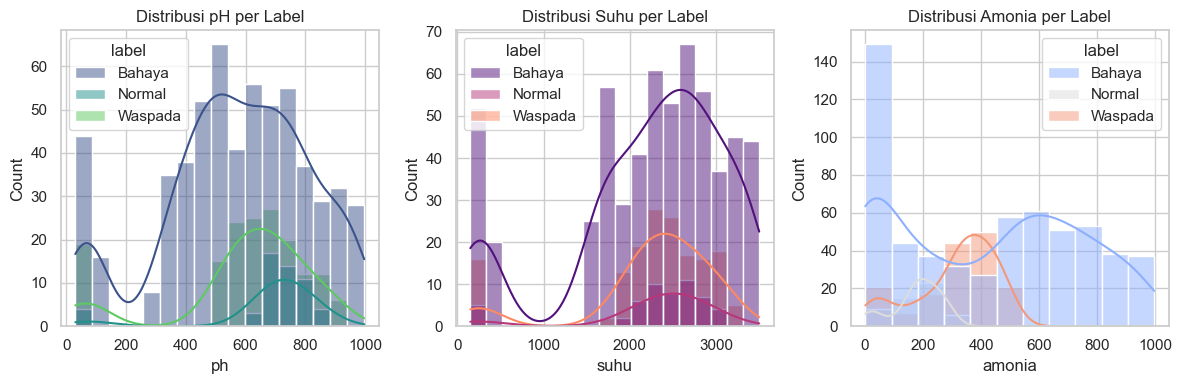

In [165]:


# Atur gaya visualisasi
sns.set(style="whitegrid")

# Visualisasi distribusi pH
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='ph', hue='label', kde=True, palette='viridis')
plt.title('Distribusi pH per Label')

# Visualisasi distribusi suhu
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='suhu', hue='label', kde=True, palette='magma')
plt.title('Distribusi Suhu per Label')

# Visualisasi distribusi amonia
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='amonia', hue='label', kde=True, palette='coolwarm')
plt.title('Distribusi Amonia per Label')

plt.tight_layout()
plt.show()


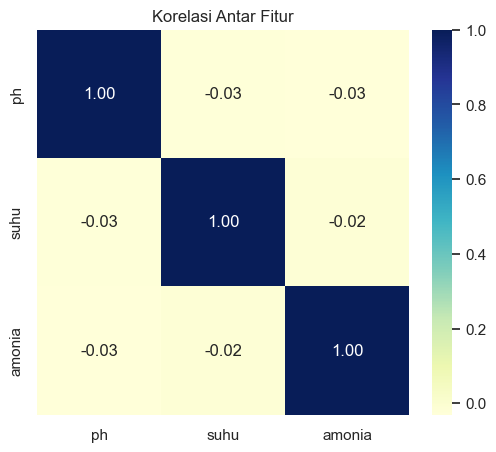

In [166]:
# Hitung korelasi antar fitur numerik
correlation = df[['ph', 'suhu', 'amonia']].corr()

# Visualisasi korelasi dalam bentuk heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()


**Preprocessing Data**

In [167]:
#Encoding Target (One-hot Encoding)


# Encoding label menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])

# One-hot encoding untuk klasifikasi multi-kelas
y_categorical = to_categorical(y_encoded)

# Simpan kembali fitur dan target
X = df[['ph', 'suhu', 'amonia']]
y = y_categorical

In [169]:
#6.2. Normalisasi Fitur (StandardScaler)

# Inisialisasi dan fit-transform ke fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [170]:
# --- 1. Load Dataset ---
df = pd.read_csv(r"C:\Users\NITRO\DEEP LEARNING\sipeka_sensor_data.csv", sep=';')

# --- 2. Pilih Fitur dan Target ---
X = df[['ph', 'suhu', 'amonia']]
y = df['label']

# --- 3. Split data: 60% train, 20% validation, 20% test ---
# Langkah pertama: split 60% train dan 40% sementara
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=42
)

# Langkah kedua: split 40% sisanya menjadi 20% val dan 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

# --- 4. Verifikasi ukuran dataset ---
print(f"Train set     : {len(X_train)} data ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} data ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set      : {len(X_test)} data ({len(X_test)/len(X)*100:.1f}%)")

# --- 5. Normalisasi Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

Train set     : 480 data (60.0%)
Validation set: 160 data (20.0%)
Test set      : 160 data (20.0%)


**Perancangan Arsitektur Model ANN**

In [171]:
# --- Hyperparameter ---
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=100,
    batch_size=16,
    verbose=1  # Gunakan 0 untuk silent, 2 untuk satu baris per epoch
)


TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'validation_data'

In [172]:
# --- 6. Encode label menjadi numerik ---


label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc   = label_encoder.transform(y_val)
y_test_enc  = label_encoder.transform(y_test)

# One-hot encoding untuk Keras
y_train_cat = to_categorical(y_train_enc)
y_val_cat   = to_categorical(y_val_enc)
y_test_cat  = to_categorical(y_test_enc)

# --- 7. Arsitektur Model ANN ---

model = Sequential([
    Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')  # Output layer untuk multi-class
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\NITRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387 (1.51 KB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

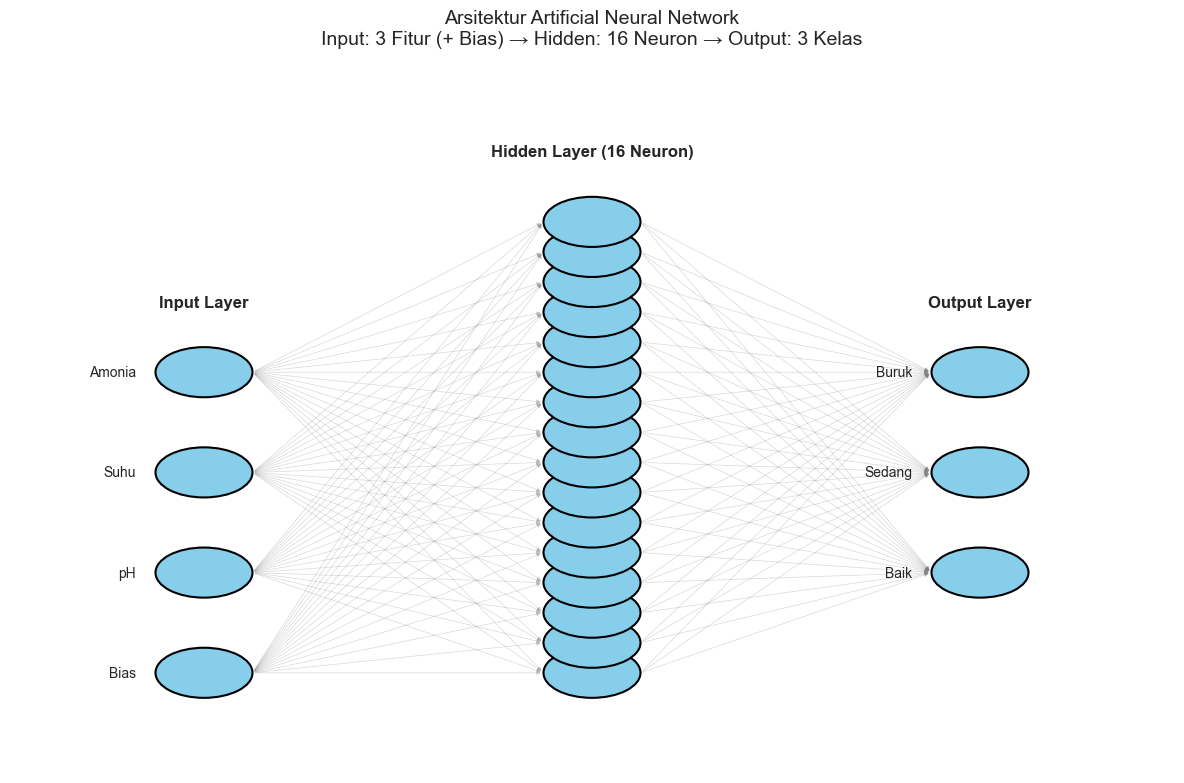

In [173]:
#Diagram Arsitektur Jaringan

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np

plt.figure(figsize=(12, 8))

# --- Fungsi untuk menggambar layer ---
def plot_layer(x_pos, y_positions, layer_name, labels=None):
    for i, y in enumerate(y_positions):
        neuron = plt.Circle((x_pos, y), 0.25, color='skyblue', ec='black', lw=1.5)
        plt.gca().add_patch(neuron)

        if labels and i < len(labels):
            plt.text(x_pos - 0.35, y, labels[i], va='center', ha='right', fontsize=10)

    plt.text(x_pos, max(y_positions) + 0.7, layer_name,
             ha='center', va='center', fontsize=12, fontweight='bold')

# --- Koordinat neuron di tiap layer ---
x_input, x_hidden, x_output = 1, 3, 5
input_y = np.linspace(1, 4, 4)             # 3 fitur + 1 bias
hidden_y = np.linspace(1, 5.5, 16)         # 16 neuron
output_y = np.linspace(2, 4, 3)            # 3 kelas

# --- Gambar neuron ---
plot_layer(x_input, input_y, 'Input Layer', labels=['Bias', 'pH', 'Suhu', 'Amonia'])
plot_layer(x_hidden, hidden_y, 'Hidden Layer (16 Neuron)')
plot_layer(x_output, output_y, 'Output Layer', labels=['Baik', 'Sedang', 'Buruk'])

# --- Fungsi untuk menggambar koneksi antar neuron ---
def draw_connections(x1, y1_list, x2, y2_list, alpha=0.4):
    for y1 in y1_list:
        for y2 in y2_list:
            arrow = FancyArrowPatch(
                (x1 + 0.25, y1), (x2 - 0.25, y2),
                arrowstyle='-|>', mutation_scale=6,
                color='gray', linewidth=0.5, alpha=alpha
            )
            plt.gca().add_patch(arrow)

# --- Gambar koneksi antar layer ---
draw_connections(x_input, input_y, x_hidden, hidden_y, alpha=0.3)
draw_connections(x_hidden, hidden_y, x_output, output_y, alpha=0.3)

# --- Format plot ---
plt.xlim(0, 6)
plt.ylim(0, 7)
plt.axis('off')
plt.title('Arsitektur Artificial Neural Network\nInput: 3 Fitur (+ Bias) → Hidden: 16 Neuron → Output: 3 Kelas',
          fontsize=14, pad=20)

plt.tight_layout()
plt.savefig('arsitektur_ann.png', dpi=300, bbox_inches='tight')
plt.show()

**Training dan Evaluasi Model**

In [174]:
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=100,
    batch_size=16,
    verbose=1  # Gunakan 0 untuk silent, 2 untuk satu baris per epoch
)



Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1484 - loss: 1.2595 - val_accuracy: 0.3125 - val_loss: 1.0695
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3652 - loss: 1.0653 - val_accuracy: 0.6750 - val_loss: 0.8991
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6515 - loss: 0.8885 - val_accuracy: 0.7312 - val_loss: 0.7793
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7211 - loss: 0.7699 - val_accuracy: 0.7312 - val_loss: 0.7095
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7192 - loss: 0.7436 - val_accuracy: 0.7312 - val_loss: 0.6713
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - loss: 0.7001 - val_accuracy: 0.7312 - val_loss: 0.6489
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7462 - loss: 0.6144 - val_accuracy: 0.7312 - val_loss: 0.6350
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7258 - loss: 0.6746 - val_accuracy: 0.7312 - 

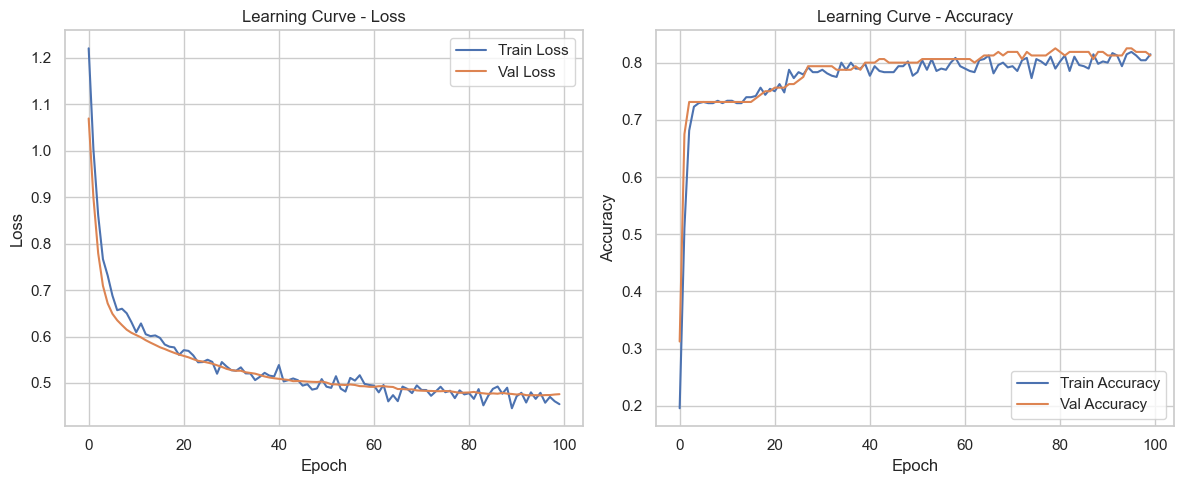

In [175]:
#7.2. Visualisasi Learning Curve (Loss & Akurasi)

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# --- Evaluasi Akhir pada Data Test ---
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

print("📌 Hasil Evaluasi Model pada Data Test")
print(f"🔹 Akurasi Test Set  : {test_acc * 100:.2f}%")
print(f"🔹 Loss Test Set     : {test_loss:.4f}")


📌 Hasil Evaluasi Model pada Data Test
🔹 Akurasi Test Set  : 76.88%
🔹 Loss Test Set     : 0.4668


In [178]:
# --- Evaluasi Akhir pada Data Validasi ---
val_loss, val_acc = model.evaluate(X_val_scaled, y_val_cat, verbose=0)

print("📌 Hasil Evaluasi Model pada Data Validasi")
print(f"🔹 Akurasi Validation Set : {val_acc * 100:.2f}%")
print(f"🔹 Loss Validation Set    : {val_loss:.4f}")




📌 Hasil Evaluasi Model pada Data Validasi
🔹 Akurasi Validation Set : 81.25%
🔹 Loss Validation Set    : 0.4760


📊 Akurasi: 75.62 %

🧾 Classification Report:
               precision    recall  f1-score   support

      Bahaya       0.95      0.77      0.85       119
      Normal       0.56      0.64      0.60        14
     Waspada       0.43      0.74      0.54        27

    accuracy                           0.76       160
   macro avg       0.65      0.72      0.66       160
weighted avg       0.83      0.76      0.78       160



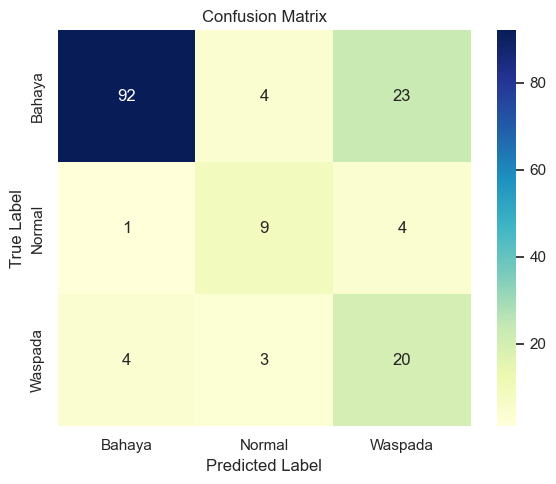

In [ ]:
#7.5. Confusion Matrix dan Analisis Per Kelas
# 7.6. Metrik Tambahan (Precision, Recall, F1-Score---
# pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Dataset ---
df = pd.read_csv(r"C:\Users\NITRO\DEEP LEARNING\sipeka_sensor_data.csv", sep=';')

# --- 2. Pilih Fitur dan Target ---
X = df[['ph', 'suhu', 'amonia']]
y = df['label']  # Pastikan kolom 'label' benar-benar ada

# --- 3. Encoding Label Kategori ke Numerik ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- 4. Split Data: 80% training, 20% testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- 5. Normalisasi Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Tangani Data Tidak Seimbang dengan SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- 7. Arsitektur Model ANN ---
model = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
model.fit(X_resampled, y_resampled)

# --- 8. Evaluasi Model ---
y_pred = model.predict(X_test_scaled)

print("📊 Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# --- 9. Visualisasi Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [179]:
import joblib

# Simpan model ke file
joblib.dump(model, 'model_ann.pkl')

# Simpan scaler dan encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [180]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load model dan preprocessing
model = joblib.load('model_ann.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        ph = data['ph']
        suhu = data['suhu']
        amonia = data['amonia']

        features = np.array([[ph, suhu, amonia]])
        features_scaled = scaler.transform(features)
        prediction = model.predict(features_scaled)
        label = label_encoder.inverse_transform(prediction)

        return jsonify({'prediction': label[0]})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

C:\Users\NITRO\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# --- 8. Evaluasi Model ---
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: Normal, Waspada, Bahaya
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # integer encoded
y_categorical = to_categorical(y_encoded)   # one-hot encoded

X_train, X_temp, y_train_enc, y_temp_enc = train_test_split(
    X, y_categorical, test_size=0.4, stratify=y_encoded, random_state=42
)

X_val, X_test, y_val_enc, y_test_enc = train_test_split(
    X_temp, y_temp_enc, test_size=0.5, stratify=y_temp_enc.argmax(axis=1), random_state=42
)
val_loss, val_acc = model.evaluate(X_val, y_val_enc, verbose=0)


c:\Users\NITRO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# --- 3. Encoding Label Kategori ke Numerik ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
